#   (Mahima and Nidhi)

##  Q3. Naive Bayes model using One-Hot Vectors for Unigram+Bigram

In [45]:
import pandas as pd

# Define the data
data = {
    "Task": [
        "SVM model with Unigram+CountVectors",
        "Training Data Check",
        "Feature Engg",
        "Cross Validation",
        "Interpretability",
        "Testing Data Check"
    ],
    "Status": [
        "Config of the model trained = YES",
        "Confusion Matrix Built? = YES",
        "Categorical/Numerical Features Added? = YES",
        "",
        "Interpretability Implemented? Local or Global?",
        "Confusion Matrix Built?= YES"
    ],
    "Results": [
        "Train Time = 5 hours",
        "F1 Score for Positive = 1709\nF1 Score for Negative = 8",
        "",
        "",
        "",
        ""
    ],
    "Individual Responsible": [
        "",
        "",
        "",
        "",
        "",
        ""
    ],
    "AUC": [
        "",
        "AUC = 0.6526998749399809",
        "",
        "",
        "",
        ""
    ],
    "Accuracy": [
        "",
        " Accuracy = 0.7072019674964273",
        "",
        "",
        "",
        "Sentiment: Positive = 297704 , Negative = 76612"
    ]
}

df = pd.DataFrame(data)
print(df)

                                  Task  \
0  SVM model with Unigram+CountVectors   
1                  Training Data Check   
2                         Feature Engg   
3                     Cross Validation   
4                     Interpretability   
5                   Testing Data Check   

                                           Status  \
0               Config of the model trained = YES   
1                   Confusion Matrix Built? = YES   
2     Categorical/Numerical Features Added? = YES   
3                                                   
4  Interpretability Implemented? Local or Global?   
5                    Confusion Matrix Built?= YES   

                                             Results Individual Responsible  \
0                                     Train Time = ?                          
1  F1 Score for Positive = 1709\nF1 Score for Neg...                          
2                                                                             
3                

# Importing pandas and reading file

In [59]:
import pandas as pd
df= pd.read_csv('Sentiment_Data.csv', encoding='ISO-8859-1')
df.head()

,Tweet,Sentiment
0,@_angelica_toy Happy Anniversary!!!....The Day...,Mild_Pos
1,@McfarlaneGlenda Happy Anniversary!!!....The D...,Mild_Pos
2,@thevivafrei @JustinTrudeau Happy Anniversary!...,Mild_Pos
3,@NChartierET Happy Anniversary!!!....The Day t...,Mild_Pos
4,@tabithapeters05 Happy Anniversary!!!....The D...,Mild_Pos


In [60]:
df.tail()

,Tweet,Sentiment
451327,Gaza; Peace n' Freedom - Viva Palestina convoy...,Strong_Pos
451328,Face of Defense: Soldier Finds Freedom in U.S....,Strong_Pos
451329,Face of Defense: Soldier Finds Freedom in U.S....,Strong_Pos
451330,"Gaza; Peace n' Freedom - ""Israel stops aid con...",Strong_Pos
451331,@convoy 83 yes! get on freedom server!,Strong_Pos


In [61]:
print(df['Tweet'].iloc[0])

@_angelica_toy Happy Anniversary!!!....The Day the FreeDUMB Died (In the tune of Don McLean's "American Pie") #FreeDumbConvoy #Freedumbers #FluTruxKlan #convoywatch #convoy #FreedomConvoy   https://t.co/ZT1cIPwmh9


In [62]:
df['Sentiment'].value_counts()

Strong_Pos    233700
Neutral        77016
Mild_Pos       64004
Strong_Neg     42556
Mild_Neg       34056
Name: Sentiment, dtype: int64

In [63]:
import warnings
warnings.filterwarnings('ignore')

# Defining the dictionary for emotions (using sentiment)

In [64]:
sentiment_mapping = {'Strong_Pos': 'Positive', 'Mild_Pos': 'Positive', 'Strong_Neg': 'Negative', 'Mild_Neg': 'Negative'}

# Replace values in 'Sentiment' column
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)


# Value counts of Sentiment

In [65]:
df['Sentiment'].value_counts()

Positive    297704
Negative     76612
Name: Sentiment, dtype: int64

# Finding Missing Values

In [66]:
df['Tweet'].isnull().value_counts()

False    451331
True          1
Name: Tweet, dtype: int64

In [67]:
df = df[df['Tweet'].notnull()]

In [68]:
df['Tweet']

0         @_angelica_toy Happy Anniversary!!!....The Day...
1         @McfarlaneGlenda Happy Anniversary!!!....The D...
2         @thevivafrei @JustinTrudeau Happy Anniversary!...
3         @NChartierET Happy Anniversary!!!....The Day t...
4         @tabithapeters05 Happy Anniversary!!!....The D...
                                ...                        
451327    Gaza; Peace n' Freedom - Viva Palestina convoy...
451328    Face of Defense: Soldier Finds Freedom in U.S....
451329    Face of Defense: Soldier Finds Freedom in U.S....
451330    Gaza; Peace n' Freedom - "Israel stops aid con...
451331               @convoy 83 yes! get on freedom server!
Name: Tweet, Length: 451331, dtype: object

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
#import wordsegment
#from wordsegment import load, segment
#load()

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Function to perform lemmatization
def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Function to derive meaning from slangs in tweets
def handling_slang(tokens):
    slang_dictionary = {
    "chill": "relax, calm, down",
    "fomo": "fear of missing out",
    "grind": "hard work, dedication",
    "savage" : "fearless",
    "squad": "group of friends",
    "hangry": "hungry and angry",
    "woke": "socially aware, enlightened",
    "swag": "stylish and confident demeanor",
    "hustle": "work hard, strive for success",
    "tbh": "to be honest",
    "af": "as f*** (extremely)",
    "u": "you",
    "fam" : "close friends or family",
    "finesse" : "getting what you want",
    "flex" : "show off",
    "lituation" : "an event that is exciting",
    "suss" : "investigate",
    "2nite": "tonight",
    "gr8": "great",
    "lit": "exciting, excellent",
    "lit af": "extremely exciting or excellent",
    "goat": "greatest of all time",
    "on fleek": "impeccably styled or presented",
    "bae-cation": "romantic vacation with one's significant other",
    "throw shade": "criticize or insult someone indirectly",
    "slay": "exhibit confidence and excellence",
    "shook" : "shocked",
    "glow up": "positive transformation",
  
    }

    tokens = [slang_dictionary.get(token, token) for token in tokens]
    return ' '.join(tokens)

In [49]:
!pip install pyspellchecker
from spellchecker import SpellChecker

def handling_spellings(tokens):
    spell = SpellChecker()
    corrected_tokens = [spell.correction(token) if token.isalpha() else token for token in tokens]
    return ' '.join(corrected_tokens)


In [50]:
# Function to handle the abbreviations used in tweets
def handling_abbreviations(tokens):
  abbreviations_dictionary = {
    "$" : " dollar ",
    "€" : " euro ",
    "acct" : "account",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dm" : "direct message",
    "eg" : "example",
    "ex": "example",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gfn" : "gone for now",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pto" : "please turn over",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}
  tokens = [abbreviations_dictionary.get(token, token) for token in tokens]
  return ''.join(tokens)

In [51]:
!pip install wordsegment
def data_preprocessing(words):

  # Check if the text is a null or a float value before processing
 if pd.notna(words) and not isinstance(words, float):
    words = words.lower()

    # Removing mentions of users (usernames starting with '@')
    words = re.sub(r'@[a-zA-Z0-9_]+', '', words)

    # Removing URLs
    words = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', words)

    # Substituting email IDs with 'EMAIL'
    words = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', 'EMAIL', words)

    # Substituting email domains with 'EMAIL_DOMAIN'
    email_domains = re.findall(r'@([A-Za-z0-9.-]+)', words)
    if email_domains:
      text = re.sub(r'@([A-Za-z0-9.-]+)', 'EMAIL_DOMAIN', words)

    # Substituting RE or re to 'REPLY_TO'
    words = re.sub(r'\b[rR][eE]:', 'REPLY_TO', words)

    # Removing punctuations using regex
    words = re.sub(r'[^\w\s]', '', words)
    
    #assigning words variable to tokens for easy apply in further preprocessing
    tokens = words
    
    # Handling english slangs
    tokens = handling_slang(tokens)

    # Handling abbreviations (short terms used for words in English)
    tokens = handling_abbreviations(tokens)

     # Tokenization
    tokens = nltk.word_tokenize(' '.join(tokens))

    # Lemmatization
    tokens = lemmatization(tokens)
    
    # Joining the tokens in one single string
    preprocessed_text = ''.join(tokens)
    
    return preprocessed_text
    
 else:
    return ''  # Return an empty string if the input is NaN or float

In [ ]:
nltk.download('omw-1.4')
#applying the function
df['Tweet'] = df['Tweet'].apply(data_preprocessing)

print(df['Tweet'].iloc[0])

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
#adding preprocessed data to csv
df.to_csv('preprocessed_data.csv', index=False)

# Display the first few rows of the DataFrame to verify the changes
df.head(10)

,Tweet,Sentiment
0,@_angelica_toy Happy Anniversary!!!....The Day...,Positive
1,@McfarlaneGlenda Happy Anniversary!!!....The D...,Positive
2,@thevivafrei @JustinTrudeau Happy Anniversary!...,Positive
3,@NChartierET Happy Anniversary!!!....The Day t...,Positive
4,@tabithapeters05 Happy Anniversary!!!....The D...,Positive
5,@JusticeStyle Happy Anniversary!!!....The Day ...,Positive
6,@Praiset22112963 @Emergencies_Act @ikwilson Ha...,Positive
7,@parnel1123 @RealAndyLeeShow Happy Anniversary...,Positive
8,Freedom Convoy as InkBlot Test https://t.co/au...,Positive
9,@WSOnlineNews @DavidKrayden Happy Anniversary!...,Positive


In [21]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
tweet = df['Tweet']
senti = df['Sentiment']
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(tweet, senti, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (361064,)
X_test shape: (90267,)
y_train shape: (361064,)
y_test shape: (90267,)


In [26]:
# Converting all entries in X_train and X_test to strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)
print("X_train:",X_train)
print("X_test:",X_test)

X_train: 403679    @michaelcoren Are you near the convoy of freedom?
359568    @wo96729803 I hear at least half of the 'freed...
215400    Ottawaâs interim police chief Steve Bell war...
71711     @DuaneDawson6 @thereds8 Great comparison re: i...
272981    @EvanLSolomon @fordnation @JustinTrudeau Can y...
                                ...                        
259179    Goodbye @tdcanadatrust Draining everything rig...
365839    Gofundme Shuts Down Truckersâ Freedom Convoy...
131933    #BREAKING: An Ottawa judge has ruled that "Fre...
146868    @keigh_see @Tinman_73 They were literally call...
121959    Conservatives &amp; Right-Wing Media on #Ottaw...
Name: Tweet, Length: 361064, dtype: object
X_test: 219578    Why would the Emergency Act still be needed if...
224266    People who call 911 to call in their displeasu...
264609    Feckless #Trudeau just made a show case to tur...
352154    The honking is working!!! Keep it up Freedom C...
27320     @FrederickBoudr2 And the Canad

In [27]:
# Vectorization using One-Hot Encoding for Unigrams and Bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2), binary=True)
X_train_nb = vectorizer.fit_transform(X_train)
X_test_nb = vectorizer.transform(X_test)
print("X_train_nb:",X_train_nb)
print("X_test_nb:",X_test_nb)

X_train_nb:   (0, 1397258)	1
  (0, 176759)	1
  (0, 2331247)	1
  (0, 1461475)	1
  (0, 2006986)	1
  (0, 625949)	1
  (0, 1517690)	1
  (0, 921177)	1
  (0, 1397260)	1
  (0, 182059)	1
  (0, 2333976)	1
  (0, 1461722)	1
  (0, 2010445)	1
  (0, 633108)	1
  (0, 1521186)	1
  (1, 2006986)	1
  (1, 625949)	1
  (1, 1517690)	1
  (1, 921177)	1
  (1, 2292244)	1
  (1, 1056626)	1
  (1, 200209)	1
  (1, 1284634)	1
  (1, 1033502)	1
  (1, 2254069)	1
  :	:
  (361063, 296131)	1
  (361063, 2078814)	1
  (361063, 134472)	1
  (361063, 134178)	1
  (361063, 611163)	1
  (361063, 1541552)	1
  (361063, 928067)	1
  (361063, 2073708)	1
  (361063, 2280808)	1
  (361063, 1384105)	1
  (361063, 617221)	1
  (361063, 272928)	1
  (361063, 136607)	1
  (361063, 1777983)	1
  (361063, 1576418)	1
  (361063, 1499626)	1
  (361063, 611166)	1
  (361063, 1223033)	1
  (361063, 135253)	1
  (361063, 760321)	1
  (361063, 1048005)	1
  (361063, 1747756)	1
  (361063, 1541997)	1
  (361063, 1337929)	1
  (361063, 1337948)	1
X_test_nb:   (0, 85117)	1


# SMOTE

In [50]:
pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)
# Apply SMOTE to balance the class distribution
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_nb, y_train)

In [52]:
# Initializing the Multinomial Naive Bayes model
nb = MultinomialNB()

In [55]:
# Defining the hyperparameter grid (smoothing parameter)
grid = {'alpha': [0.1, 0.5, 1.0]}

grid {'alpha': [0.1, 0.5, 1.0]}


In [54]:
# Converting all to sstring type
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [55]:
# Performing Grid Search with Cross-Validation
#training
g_search = GridSearchCV(nb, grid, cv=5, scoring='accuracy')
g_search.fit(X_train_nb, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0]}, scoring='accuracy')

In [56]:
#Finding the best model found by Grid Search
best_nb = g_search.best_estimator_

In [57]:
# Predicting on the test set

#predict
y_pred_nb = best_nb.predict(X_test_nb)

# Evaluation metrics

In [58]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
auc_nb = roc_auc_score(y_test, best_nb.predict_proba(X_test_nb), multi_class='ovr')
acc_nb = accuracy_score(y_test, y_pred_nb)

 # Plotting for Confusion Matrix

In [59]:
#Importing libraries for plotting Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

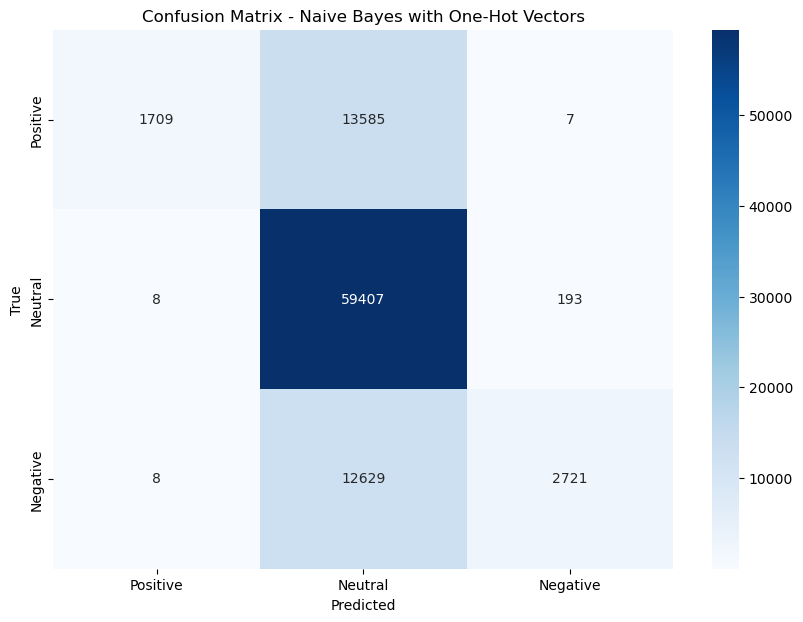

F1 Score: 0.624926675288497
AUC: 0.6526998749399809
Accuracy: 0.7072019674964273


In [60]:
def NB_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()
NB_confusion_matrix(cm_nb, classes=['Positive', 'Neutral', 'Negative'], title='Confusion Matrix - Naive Bayes with One-Hot Vectors')
print(f"F1 Score: {f1_nb}")
print(f"AUC: {auc_nb}")
print(f"Accuracy: {acc_nb}")

# ROC curves - Naive bayes along with one-hot vectors

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
y_score_oh = best_nb.predict_proba(X_test_nb) #THIS IS USE FOR TO PREDICTS THE PROBABILITY OF EACH CLASS FOR THE TEST DATASET.
y_test_bin = label_binarize(y_test, classes=['Positive', 'Neutral', 'Negative']) #CONVERT INTO BINARY AND EACH CLASS HAS IT'S OWN COLUMN.
n_classes = y_test_bin.shape[1] #NO OF UNIQUE CLASS

fpr, tpr, roc_auc = {}, {}, {}  #TO STORE FP TP AND AUC VALUES.
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_oh[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

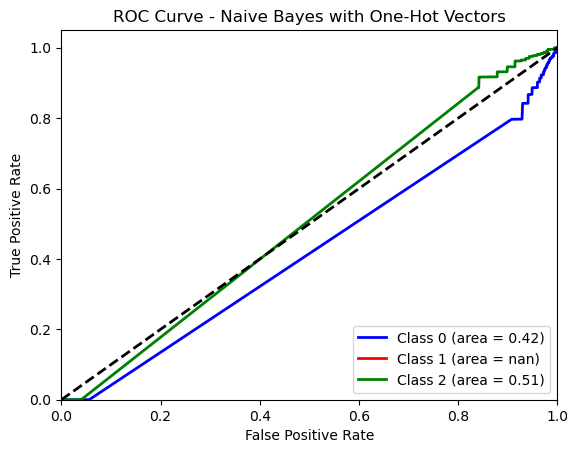

In [62]:
# Plot ROC curves for each class
colors = ['blue', 'red', 'green']
plt.figure()
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes with One-Hot Vectors')
plt.legend(loc="lower right")
plt.show()